<h1 align=center>Assignment  67: Ensemble Techniques 4</h1>

### Build a random forest classifier to predict the risk of heart disease based on a dataset of patient information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type, resting blood pressure, serum cholesterol, and maximum heart rate achieved.

Dataset link : [https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?usp=share_link](https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?usp=share_link)


# Queston 1 : Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary

## Answer :

### Step 1 : Read the dataset and check its basic information

In [2]:
import pandas as pd
df = pd.read_csv('./dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.shape

(303, 14)

### Step 2 : Check Missing Values in Dataset 

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No null value found in dataset

### Step 3 : Dataset Description

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [11]:
df.nunique().sort_values()

sex           2
fbs           2
exang         2
target        2
restecg       3
slope         3
cp            4
thal          4
ca            5
oldpeak      40
age          41
trestbps     49
thalach      91
chol        152
dtype: int64

### No Encoding is required as all datatypes are already  in numerical format also Random Forest does not require Featrue Scaling

### Step 4 : Seperating X and Y variables 

In [12]:
X = df.iloc[:,:-1]

y = df.iloc[:,-1]

In [13]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [14]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

# Question 2 : Split the dataset into a training set (70%) and a test set (30%).

In [15]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest, ytrain,ytest = train_test_split(X,y, train_size=0.30, random_state=42)

In [16]:
Xtrain.shape

(90, 13)

In [17]:
Xtest.shape

(213, 13)

# Question 3 : Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.

## Answer :

In [18]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, max_depth=100)
rfc.fit(Xtrain,ytrain)

RandomForestClassifier(max_depth=100)

# Question 4 : Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(x,y,model):
    ypred = model.predict(x)
    
    acc = accuracy_score(y,ypred)
    pre = precision_score(y,ypred)
    rcl = recall_score(y,ypred)
    f1s = f1_score(y,ypred)
    
    print(f"Accuracy Score: {acc*100: .2f}")
    print(f"Accuracy Score: {pre*100: .2f}")
    print(f"Accuracy Score: {rcl*100: .2f}")
    print(f"Accuracy Score: {f1s*100: .2f}")
    
    return acc, pre, rcl, f1s

In [26]:
accuracy, precision, recall, f1score = evaluate_model(Xtest, ytest,rfc)

Accuracy Score:  80.75
Accuracy Score:  80.99
Accuracy Score:  84.48
Accuracy Score:  82.70


In [27]:
from sklearn.metrics import classification_report

y_pred = rfc.predict(Xtest)
print(f"Calssification Report : \n {classification_report(y_pred,ytest)}")

Calssification Report : 
               precision    recall  f1-score   support

           0       0.76      0.80      0.78        92
           1       0.84      0.81      0.83       121

    accuracy                           0.81       213
   macro avg       0.80      0.81      0.81       213
weighted avg       0.81      0.81      0.81       213



<Axes: >

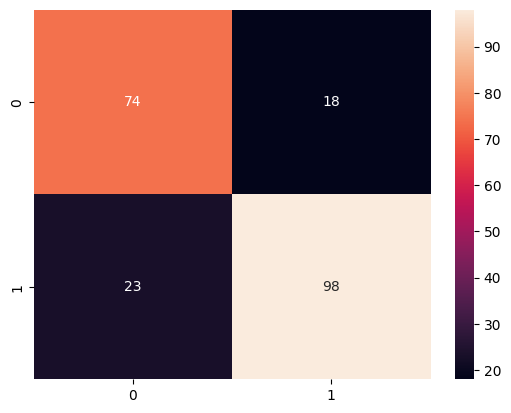

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cnf = confusion_matrix(y_pred,ytest)
sns.heatmap(cnf, annot=True, fmt='d')

# Question 5 : Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.

## Answer :

In [31]:
rfc.feature_importances_

array([0.06901954, 0.01833985, 0.19886516, 0.06069081, 0.07850931,
       0.00760998, 0.01953522, 0.11379878, 0.04703978, 0.13610806,
       0.03872628, 0.10670384, 0.10505341])

In [32]:
rfc.feature_names_in_

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype=object)

In [39]:
imp = pd.Series(rfc.feature_importances_)
imp.index = rfc.feature_names_in_
imp = imp.sort_values(ascending=False)

In [40]:
imp

cp          0.198865
oldpeak     0.136108
thalach     0.113799
ca          0.106704
thal        0.105053
chol        0.078509
age         0.069020
trestbps    0.060691
exang       0.047040
slope       0.038726
restecg     0.019535
sex         0.018340
fbs         0.007610
dtype: float64

In [44]:
top5 = list(imp[:5].index)

In [45]:
print(f'Top 5 features in the data are : {top5}')

Top 5 features in the data are : ['cp', 'oldpeak', 'thalach', 'ca', 'thal']


<Axes: >

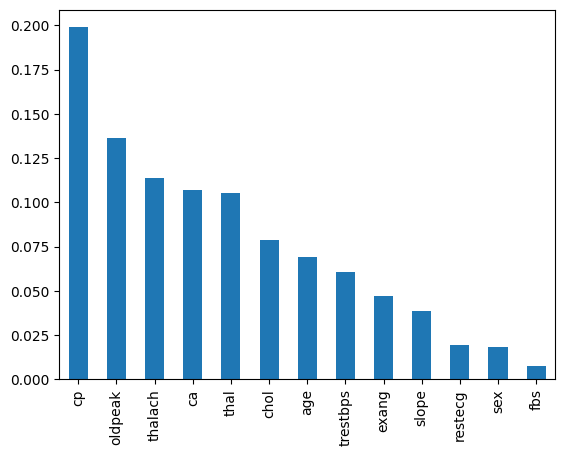

In [46]:
imp.plot(kind='bar')

# Question 6 : Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

## Answer :

In [47]:
# Defining the parameters for tuning
parameters = {
    'n_estimators':[10,50,100,200,300,400],
    'max_depth':[4,5,6,7,8,9,10],
    'min_samples_leaf':[2,3,4,5,6],
    'min_samples_split':[2,5,10]
}

In [48]:
# Performing Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV
rscv = RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=parameters,
                        cv=5, 
                        scoring='f1',
                        n_iter=50,
                        verbose=3)

In [49]:
rscv.fit(Xtrain,ytrain)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=300;, score=0.870 total time=   0.3s
[CV 2/5] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=300;, score=0.857 total time=   0.5s
[CV 3/5] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=300;, score=0.842 total time=   0.3s
[CV 4/5] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=300;, score=0.909 total time=   0.3s
[CV 5/5] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=300;, score=0.778 total time=   0.3s
[CV 1/5] END max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.833 total time=   0.2s
[CV 2/5] END max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.857 total time=   0.1s
[CV 3/5] END max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.842 total time=   0.1s

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [4, 5, 6, 7, 8, 9, 10],
                                        'min_samples_leaf': [2, 3, 4, 5, 6],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200, 300,
                                                         400]},
                   scoring='f1', verbose=3)

In [50]:
rscv.best_score_

0.8615260153017591

# Question 7 : Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.

## Answer :

In [51]:
# Best Parameters
rscv.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 3,
 'max_depth': 5}

In [52]:
# Best Estimator (Model)
rscv.best_estimator_

RandomForestClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=200)

In [53]:
# Best F1 Score
rscv.best_score_

0.8615260153017591

In [55]:
# Testing Accuracy on tuned model
print('Results for Tuned Model :\n')
acc_tuned, pre_tuned , rec_tuned, f1_tuned = evaluate_model(Xtest,ytest.values.flatten(),rscv)

Results for Tuned Model :

Accuracy Score:  84.04
Accuracy Score:  83.61
Accuracy Score:  87.93
Accuracy Score:  85.71


In [57]:
dct = {
    'metrics':['accuracy','precision','recall','f1'],
    'base model':[accuracy,precision,recall,f1score],
    'tuned model':[acc_tuned,pre_tuned,rec_tuned,f1_tuned]
}

In [58]:
df_compare = pd.DataFrame(dct)
df_compare

,metrics,base model,tuned model
0,accuracy,0.807512,0.840376
1,precision,0.809917,0.836066
2,recall,0.844828,0.879310
3,f1,0.827004,0.857143


### All parameters of the tuned model increases all scores. 

# Question 8 : Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.

## Answer :

In [59]:
best_rfc = rscv.best_estimator_
best_rfc

RandomForestClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=200)

In [60]:
imp_tuned = best_rfc.feature_importances_
imp_tuned = pd.Series(imp_tuned)
imp_tuned.index = best_rfc.feature_names_in_
imp_tuned = imp_tuned.sort_values(ascending=False)
imp_tuned

cp          0.229638
ca          0.147092
oldpeak     0.144544
thal        0.137230
thalach     0.076340
exang       0.065568
slope       0.055224
age         0.045530
trestbps    0.039464
chol        0.035944
sex         0.013160
restecg     0.007800
fbs         0.002467
dtype: float64

In [61]:
imp_tuned[0:2]

cp    0.229638
ca    0.147092
dtype: float64

<Axes: title={'center': 'Feature Importances for tuned model'}>

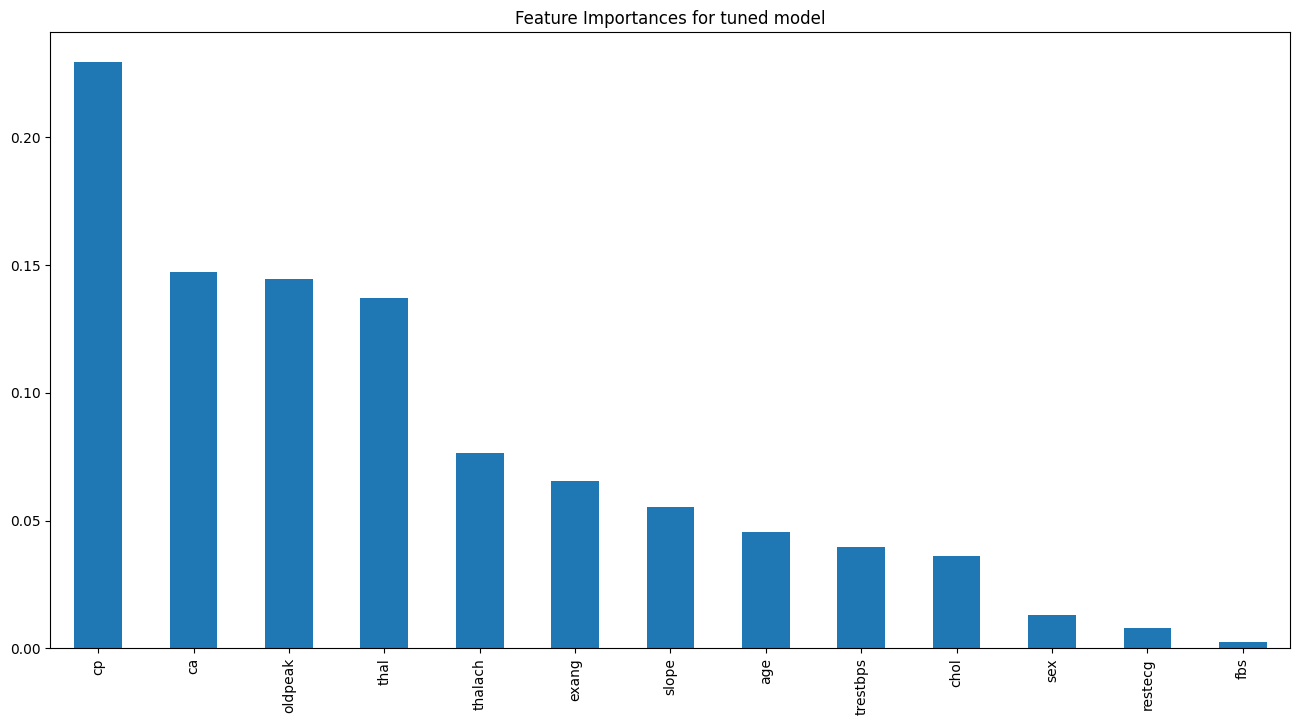

In [62]:
imp_tuned.plot(kind='bar',title='Feature Importances for tuned model',figsize=(16,8))

In [64]:
top2 = Xtrain[['ca','cp']]
top2.head()

,ca,cp
62,0,3
135,0,0
128,0,2
293,0,2
8,0,2


In [65]:
df_top2 =pd.concat([top2,ytrain],axis=1)
df_top2.head()

,ca,cp,target
62,0,3,1
135,0,0,1
128,0,2,1
293,0,2,0
8,0,2,1


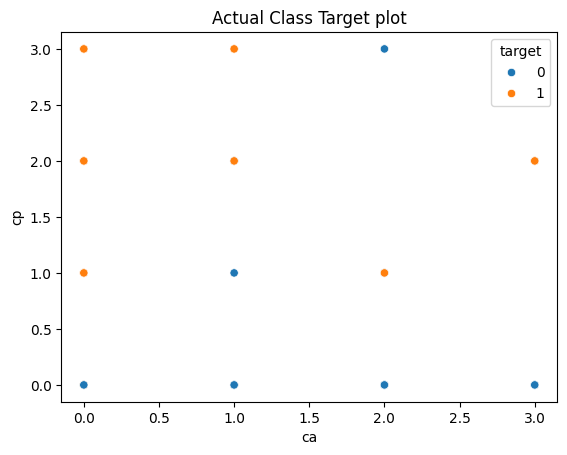

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df_top2,x='ca',y='cp',hue='target')
plt.title('Actual Class Target plot')
plt.show()

In [68]:
df_top2['predicted'] = best_rfc.predict(Xtrain)

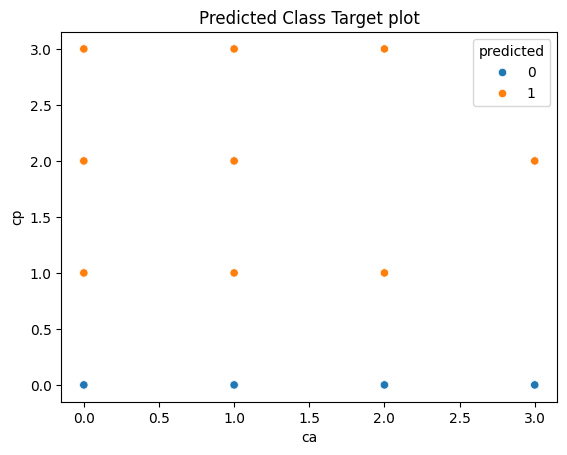

In [69]:
sns.scatterplot(data=df_top2,x='ca',y='cp',hue='predicted')
plt.title('Predicted Class Target plot')
plt.show()